In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
df = pd.read_json("../data/predictions.json")

/opt/conda/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [129]:
df = df.drop(columns=['tweet', 'neutralny', 'neutralne'])

In [130]:
dates =  pd.to_datetime(df.date, format='%m-%d-%y')
print(dates)


0      2021-01-21
1      2021-01-21
2      2021-01-21
3      2021-01-21
4      2021-01-21
          ...    
6619   2020-12-01
6620   2020-12-01
6621   2020-12-01
6622   2020-12-01
6623   2020-12-01
Name: date, Length: 6624, dtype: datetime64[ns]


In [131]:
def parse_soft_max(x):
    values = [x.oczekiwanie, x.podziw, x.radosc, x.smutek, x.strach, x.wstret, x.zaskoczenie, x.zlosc]
    max_val = max(values)
    copy_of_vals = values[:]
    copy_of_vals.remove(max_val)
    second_max_val = max(copy_of_vals)
    copy_of_vals.remove(second_max_val)
    third_max_val = max(copy_of_vals)
    
    response = [x.created_at, x.date]
    for val in values:
        response.append(val == max_val)
    return response

soft_df = df.apply(parse_soft_max, axis=1, result_type='broadcast')

In [132]:
df.head(60)

,created_at,date,oczekiwanie,podziw,radosc,smutek,strach,wstret,zaskoczenie,zlosc
0,2021-01-21 17:14:32,2021-01-21,0.010511,0.000725,9.866700e-06,0.000030,0.313553,1.889680e-04,4.058292e-04,0.001288
1,2021-01-21 16:55:48,2021-01-21,0.002145,0.000023,1.045420e-05,0.000199,0.001772,1.029006e-04,1.533200e-06,0.000032
2,2021-01-21 16:22:05,2021-01-21,0.071611,0.000256,3.653170e-05,0.003586,0.010407,2.308035e-01,1.856272e-04,0.422429
3,2021-01-21 16:22:04,2021-01-21,0.047503,0.000157,1.483780e-05,0.002143,0.010012,2.302581e-01,2.398813e-04,0.599290
4,2021-01-21 16:22:02,2021-01-21,0.009160,0.000070,1.188120e-05,0.000100,0.002076,4.193089e-04,2.805600e-06,0.000552
5,2021-01-21 16:12:42,2021-01-21,0.065199,0.001677,7.462774e-04,0.023841,0.550307,1.493089e-02,1.034424e-01,0.027299
6,2021-01-21 16:09:07,2021-01-21,0.088116,0.000850,8.251692e-04,0.028105,0.056726,2.342042e-02,2.245156e-03,0.020412
7,2021-01-21 16:01:00,2021-01-21,0.057489,0.001339,2.931315e-04,0.000151,0.005591,1.005863e-04,3.925670e-05,0.000611
8,2021-01-21 15:43:33,2021-01-21,0.467156,0.224111,6.882049e-03,0.000086,0.005744,3.993421e-04,3.521867e-04,0.027303
9,2021-01-21 15:43:21,2021-01-21,0.378903,0.000371,4.223219e-02,0.178394,0.000230,1.490268e-03,4.268606e-04,0.001407


In [180]:
emotion_per_day = soft_df.assign(date=dates).groupby([pd.Grouper(key='date', freq='1D')]).sum().reset_index()

emotion_per_day = emotion_per_day.set_index('date')
emotion_per_day

,oczekiwanie,podziw,radosc,smutek,strach,wstret,zaskoczenie,zlosc
date,,,,,,,,
2020-12-01,6,0,0,0,14,0,0,0
2020-12-02,68,0,0,2,49,6,1,6
2020-12-03,37,0,1,2,24,3,0,9
2020-12-04,42,0,0,3,42,5,2,3
2020-12-05,14,0,1,0,12,4,0,8
2020-12-06,16,0,0,0,14,1,1,3
2020-12-07,23,0,1,2,15,5,0,3
2020-12-08,41,1,4,1,34,3,0,9
2020-12-09,29,1,3,3,31,3,1,4


<Figure size 432x216 with 0 Axes>

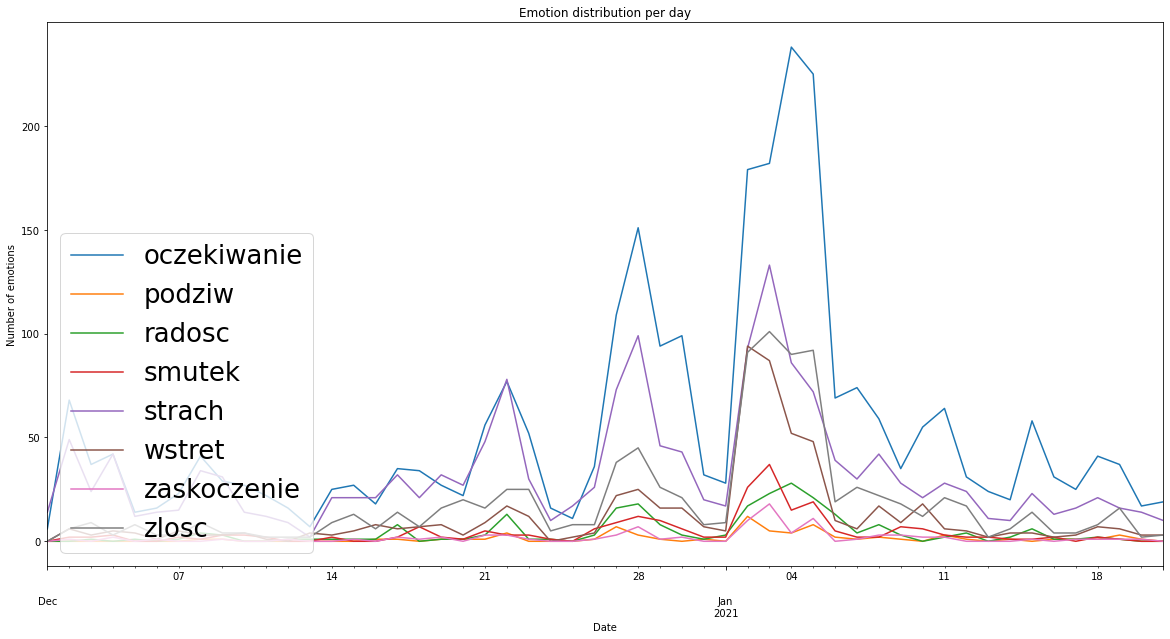

In [181]:
plt.figure();

ax = emotion_per_day[['oczekiwanie', 'podziw', 'radosc', 'smutek', 'strach', 'wstret', 'zaskoczenie', 'zlosc']].plot(figsize=(20,10))
ax.set_title('Emotion distribution per day')
ax.yaxis.set_label_text('Number of emotions')
ax.xaxis.set_label_text('Date')
plt.legend(fontsize = 26, loc=3)

In [151]:
def parse_to_perc(x):
    values = [x.oczekiwanie, x.podziw, x.radosc, x.smutek, x.strach, x.wstret, x.zaskoczenie, x.zlosc]
    sums = sum(float(i) for i in values)
    
    response = []
    for val in values:
        response.append(float(val)/sums*100)
    return response
percentage_df = emotion_per_day.apply(parse_to_perc, axis=1, result_type='broadcast')
percentage_df['sum'] = emotion_per_day.sum(axis = 1, skipna = True)
percentage_df

,oczekiwanie,podziw,radosc,smutek,strach,wstret,zaskoczenie,zlosc,sum
date,,,,,,,,,
2020-12-01,45,0,0,2,37,5,0,7,448
2020-12-08,45,0,2,3,33,4,0,8,365
2020-12-15,36,0,2,2,33,7,1,15,605
2020-12-22,39,1,4,2,29,7,1,13,1137
2020-12-29,39,1,3,4,20,12,1,16,2152
2021-01-05,44,1,3,3,20,8,1,16,1299
2021-01-12,49,1,3,2,25,5,0,11,464
2021-01-19,47,2,0,0,25,7,1,13,154


<Figure size 432x216 with 0 Axes>

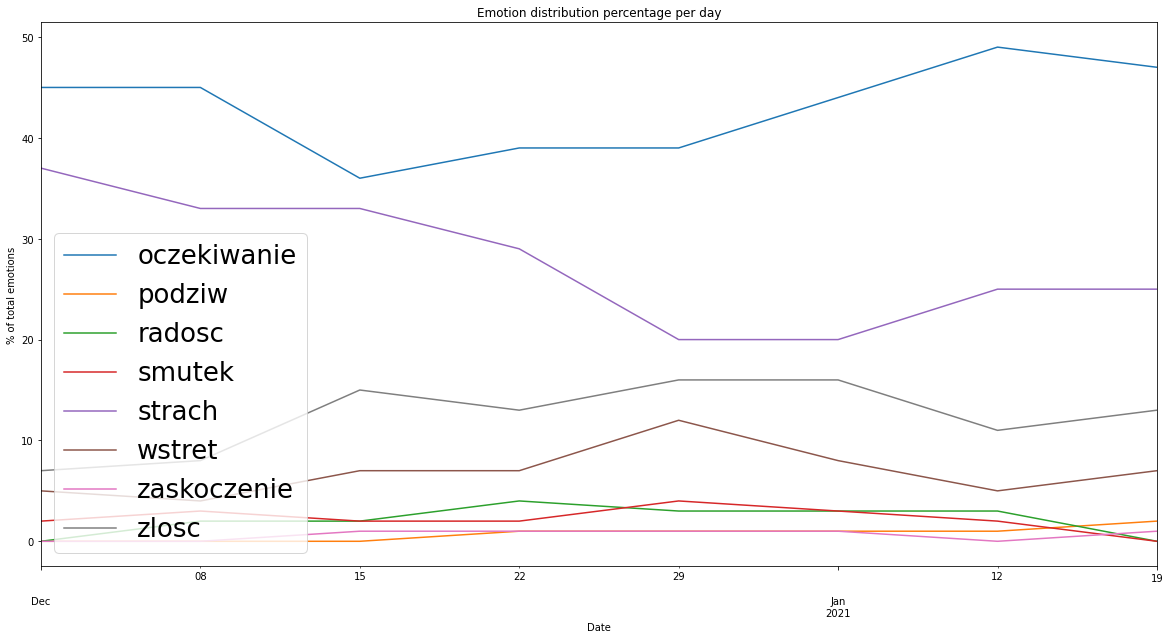

In [178]:
plt.figure();
ax = percentage_df[['oczekiwanie', 'podziw', 'radosc', 'smutek', 'strach', 'wstret', 'zaskoczenie', 'zlosc']].plot(figsize=(20,10))
ax.set_title('Emotion distribution percentage per day')
ax.yaxis.set_label_text('% of total emotions')
ax.xaxis.set_label_text('Date')
plt.legend(fontsize = 26, loc=3)